In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from matplotlib.colors import Normalize, ListedColormap
from matplotlib.cm import ScalarMappable
import ast
import re


In [51]:
# first load tables

domain_table = pd.read_csv('/Volumes/PGH-Backup/domains/IPS/all_IPS_results.tsv', sep='\t', header=None)

display(domain_table, domain_table.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/PGH-Backup/domains/IPS/all_IPS_results.tsv'

In [ ]:
# Group by the enzyme name and aggregate the domain column as a list
grouped_df = domain_table.groupby(0)[12].apply(list).reset_index()


In [ ]:
display(grouped_df)

In [ ]:
grouped_df_clean = grouped_df

In [ ]:
grouped_df_clean[0] = grouped_df_clean[0].str.split('|').str[0]

display(grouped_df_clean)

In [ ]:
grouped_df_clean.to_csv('/Volumes/PGH-Backup/domains/IPS/all_IPS_results_grouped.tsv', sep='\t', index=False, header=False)

**Begin Merging with cluster table**

In [52]:
## Temporary swap to a windows enviorment, paths changed accordingly
grouped_df_clean = pd.read_csv("E:\\domains\\IPS\\all_IPS_results_grouped.tsv", sep='\t', header=None)
display(grouped_df_clean)

,0,1
0,Amidase_UniRef100_A0A009ES59,['N-acetylmuramoyl-L-alanine amidase domain']
1,Amidase_UniRef100_A0A009FUX6,"['N-acetylmuramoyl-L-alanine amidase, catalyti..."
2,Amidase_UniRef100_A0A009H4S4,['N-acetylmuramoyl-L-alanine amidase domain']
3,Amidase_UniRef100_A0A009HT94,['N-acetylmuramoyl-L-alanine amidase domain']
4,Amidase_UniRef100_A0A009L0R9,['N-acetylmuramoyl-L-alanine amidase domain']
...,...,...
707784,UC118_WP_253005939.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai..."
707785,UC118_WP_255820014.1,"['LysM domain', 'LysM domain', 'LysM domain', ..."
707786,UC118_WP_263296879.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai..."
707787,UC118_WP_263297069.1,"['LysM domain', 'LysM domain', 'LysM domain', ..."


In [53]:
grouped_df_clean.rename(columns={0: 'FullIdentifier', 1: 'Domains'}, inplace=True)

In [54]:
grouped_df_clean['Uniref'] = grouped_df_clean['FullIdentifier'].str.split('_').str[2]

grouped_df_clean['Enzyme'] = grouped_df_clean['FullIdentifier'].str.split('_').str[0]

display(grouped_df_clean)

,FullIdentifier,Domains,Uniref,Enzyme
0,Amidase_UniRef100_A0A009ES59,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009ES59,Amidase
1,Amidase_UniRef100_A0A009FUX6,"['N-acetylmuramoyl-L-alanine amidase, catalyti...",A0A009FUX6,Amidase
2,Amidase_UniRef100_A0A009H4S4,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009H4S4,Amidase
3,Amidase_UniRef100_A0A009HT94,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009HT94,Amidase
4,Amidase_UniRef100_A0A009L0R9,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009L0R9,Amidase
...,...,...,...,...
707784,UC118_WP_253005939.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",253005939.1,UC118
707785,UC118_WP_255820014.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",255820014.1,UC118
707786,UC118_WP_263296879.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",263296879.1,UC118
707787,UC118_WP_263297069.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",263297069.1,UC118


In [56]:
grouped_df_clean.drop_duplicates(subset='Uniref', inplace=True)

display(grouped_df_clean)


,FullIdentifier,Domains,Uniref,Enzyme
0,Amidase_UniRef100_A0A009ES59,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009ES59,Amidase
1,Amidase_UniRef100_A0A009FUX6,"['N-acetylmuramoyl-L-alanine amidase, catalyti...",A0A009FUX6,Amidase
2,Amidase_UniRef100_A0A009H4S4,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009H4S4,Amidase
3,Amidase_UniRef100_A0A009HT94,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009HT94,Amidase
4,Amidase_UniRef100_A0A009L0R9,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009L0R9,Amidase
...,...,...,...,...
707784,UC118_WP_253005939.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",253005939.1,UC118
707785,UC118_WP_255820014.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",255820014.1,UC118
707786,UC118_WP_263296879.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",263296879.1,UC118
707787,UC118_WP_263297069.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",263297069.1,UC118


In [55]:
# read in cluster map
cluster_map = pd.read_csv("E:\\clustering\\newest_cluster_maps\\catted_maps.tsv", sep='\t', index_col=0, header=None)

display(cluster_map)

,1,2,3
0,,,
0,A0A432IFZ8,A0A432IFZ8,A0A534TJ56
1,A0A369Y4I6,A0A432IFZ8,A0A534TJ56
2,E3HA38,A0A432IFZ8,A0A534TJ56
3,UPI0004050AE8,A0A369PUK8,A0A455SSC1
4,A0A924USN5,A0A369PUK8,A0A455SSC1
...,...,...,...
331605,R5VGU4,R5VGU4,R5VGU4
331606,T0DIM4,T0DIM4,A0A5N7MBX0
331607,UPI000EA3697F,T0DIM4,A0A5N7MBX0


In [57]:
cluster_map.rename(columns={1: 'unclustered', 2: 'mmseqs', 3: 'foldseek'}, inplace=True)

display(cluster_map)

,unclustered,mmseqs,foldseek
0,,,
0,A0A432IFZ8,A0A432IFZ8,A0A534TJ56
1,A0A369Y4I6,A0A432IFZ8,A0A534TJ56
2,E3HA38,A0A432IFZ8,A0A534TJ56
3,UPI0004050AE8,A0A369PUK8,A0A455SSC1
4,A0A924USN5,A0A369PUK8,A0A455SSC1
...,...,...,...
331605,R5VGU4,R5VGU4,R5VGU4
331606,T0DIM4,T0DIM4,A0A5N7MBX0
331607,UPI000EA3697F,T0DIM4,A0A5N7MBX0


In [58]:
# merge the two tables
merged_df = pd.merge(grouped_df_clean, cluster_map, left_on='Uniref', right_on='unclustered', how='left')

display(merged_df)

,FullIdentifier,Domains,Uniref,Enzyme,unclustered,mmseqs,foldseek
0,Amidase_UniRef100_A0A009ES59,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009ES59,Amidase,A0A009ES59,A0A1S2T3X5,A0A2M7A5W4
1,Amidase_UniRef100_A0A009FUX6,"['N-acetylmuramoyl-L-alanine amidase, catalyti...",A0A009FUX6,Amidase,A0A009FUX6,A0A062BTC2,A0A062BTC2
2,Amidase_UniRef100_A0A009H4S4,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009H4S4,Amidase,A0A009H4S4,A0A1S2T3X5,A0A2M7A5W4
3,Amidase_UniRef100_A0A009HT94,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009HT94,Amidase,A0A009HT94,A0A1S2T3X5,A0A2M7A5W4
4,Amidase_UniRef100_A0A009L0R9,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009L0R9,Amidase,A0A009L0R9,A0A1S2T3X5,A0A2M7A5W4
...,...,...,...,...,...,...,...
697073,UC118_WP_253005939.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",253005939.1,UC118,NaN,NaN,NaN
697074,UC118_WP_255820014.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",255820014.1,UC118,NaN,NaN,NaN
697075,UC118_WP_263296879.1,"['Endopeptidase, NLPC/P60 domain', 'LysM domai...",263296879.1,UC118,NaN,NaN,NaN
697076,UC118_WP_263297069.1,"['LysM domain', 'LysM domain', 'LysM domain', ...",263297069.1,UC118,NaN,NaN,NaN


In [59]:
# Drop rows where foldseek columns is NaN
merged_df = merged_df.dropna(subset=['foldseek'])

display(merged_df)

,FullIdentifier,Domains,Uniref,Enzyme,unclustered,mmseqs,foldseek
0,Amidase_UniRef100_A0A009ES59,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009ES59,Amidase,A0A009ES59,A0A1S2T3X5,A0A2M7A5W4
1,Amidase_UniRef100_A0A009FUX6,"['N-acetylmuramoyl-L-alanine amidase, catalyti...",A0A009FUX6,Amidase,A0A009FUX6,A0A062BTC2,A0A062BTC2
2,Amidase_UniRef100_A0A009H4S4,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009H4S4,Amidase,A0A009H4S4,A0A1S2T3X5,A0A2M7A5W4
3,Amidase_UniRef100_A0A009HT94,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009HT94,Amidase,A0A009HT94,A0A1S2T3X5,A0A2M7A5W4
4,Amidase_UniRef100_A0A009L0R9,['N-acetylmuramoyl-L-alanine amidase domain'],A0A009L0R9,Amidase,A0A009L0R9,A0A1S2T3X5,A0A2M7A5W4
...,...,...,...,...,...,...,...
697001,Muramidase_UniRef100_Z9JH77,"['Transglycosylase SLT domain 1', 'Lytic trans...",Z9JH77,Muramidase,Z9JH77,A0A7W8G076,A0A2G6LD42
697002,Muramidase_UniRef100_Z9JHW0,"['Glycoside hydrolase, family 24']",Z9JHW0,Muramidase,Z9JHW0,A0A0M3SVL5,C6XGM8
697003,Muramidase_UniRef100_Z9JPH1,"['Glycoside hydrolase, family 25']",Z9JPH1,Muramidase,Z9JPH1,A0A2U2RN54,A0A1Y4QR82
697004,Muramidase_UniRef100_Z9JTP7,"['Resuscitation-promoting factor, core lysozym...",Z9JTP7,Muramidase,Z9JTP7,Z9JTP7,A0A3N6FSL3


In [60]:
grouped_merged_domain_cluster = merged_df.groupby('foldseek').agg({
    'Domains': list,    # Aggregate Domains into a list
    'Uniref': list,     # Aggregate Uniref into a list
    'Enzyme': set       # Aggregate Enzyme into a set (to remove duplicates)
}).reset_index()

In [61]:
display(grouped_merged_domain_cluster)

,foldseek,Domains,Uniref,Enzyme
0,A0A011N0Q1,"[['Transglycosylase SLT domain 1'], ['Transgly...","[A0A095W6D6, A0A0D6IHE2, A0A0E3ZL48, A0A0H4W21...",{Muramidase}
1,A0A017SVH6,"[['Transglycosylase SLT domain 1'], ['Transgly...","[A0A017SVH6, A0A0G0BQW0, A0A136P883, A0A150Q8Q...",{Muramidase}
2,A0A017SVL5,"[['Transglycosylase SLT domain 1', 'LysM domai...","[A0A017SVL5, UPI001FDFCFF6]",{Muramidase}
3,A0A017T4A7,"[['Glycoside hydrolase, family 19, catalytic',...","[A0A017T4A7, A0A085WGA7]",{Muramidase}
4,A0A017TEG0,[['N-acetylmuramoyl-L-alanine amidase domain']...,"[A0A017TEG0, A0A540WW64, A0A5C5VU41, A0A7Y7CBT...",{Amidase}
...,...,...,...,...
3876,X0QTD2,"[['Transglycosylase SLT domain 1', 'LysM domai...","[A0A084CNH3, A0A098Q2K7, A0A0B2CLP3, A0A0D0I0W...",{Muramidase}
3877,X5M7P7,"[['Glycoside hydrolase, family 24'], ['Glycosi...","[A0A829Z1I7, UPI001ABB9E16, X5M7P7]",{Muramidase}
3878,X8DEL9,"[['Peptidase M15C'], ['Peptidase M15C'], ['Pep...","[A0A315TGV3, A0A370ETB6, A0A542UWN2, A0A6G9CS9...",{DD-carboxypeptidase}
3879,X8DKT4,[['N-acetylmuramoyl-L-alanine amidase domain']...,"[A0A1C3ERX2, A0A1N6KSK0, A0A257WHZ8, A0A432MMZ...",{Amidase}


In [ ]:
grouped_merged_domain_cluster['member_count'] = grouped_merged_domain_cluster['Uniref'].apply(len)

display(grouped_merged_domain_cluster)

In [ ]:
grouped_merged_domain_cluster.to_csv("E:\\domains\\IPS\\grouped_merged_domain_cluster.tsv", sep='\t', index=False)

**Generate Network Plots**

In [3]:
grouped_merged_domain_cluster = pd.read_csv("E:\\domains\\IPS\\grouped_merged_domain_cluster.tsv", sep='\t')

In [4]:
print(grouped_merged_domain_cluster['Domains'].head())


0    ["['Transglycosylase SLT domain 1']", "['Trans...
1    ["['Transglycosylase SLT domain 1']", "['Trans...
2    ["['Transglycosylase SLT domain 1', 'LysM doma...
3    ["['Glycoside hydrolase, family 19, catalytic'...
4    ["['N-acetylmuramoyl-L-alanine amidase domain'...
Name: Domains, dtype: object


In [5]:
def clean_and_convert(domain_string):
    # Remove the outermost brackets and quotes
    cleaned_string = re.sub(r'[\[\]\'\"]', '', domain_string)
    
    # Split the string on '], [' to separate domain entries (this avoids splitting the domain name itself)
    domain_list = cleaned_string.split(", ")
    
    return domain_list



In [6]:
# Step 1: Apply the cleaning function to convert the string to a proper list
grouped_merged_domain_cluster['Domains'] = grouped_merged_domain_cluster['Domains'].apply(
    lambda x: clean_and_convert(x) if isinstance(x, str) else x
)

# Display the cleaned DataFrame
print(grouped_merged_domain_cluster['Domains'].head())


0    [Transglycosylase SLT domain 1, Transglycosyla...
1    [Transglycosylase SLT domain 1, Transglycosyla...
2    [Transglycosylase SLT domain 1, LysM domain, L...
3    [Glycoside hydrolase, family 19, catalytic, Pe...
4    [N-acetylmuramoyl-L-alanine amidase domain, N-...
Name: Domains, dtype: object


In [7]:
display(grouped_merged_domain_cluster)

,foldseek,Domains,Uniref,Enzyme,member_count
0,A0A011N0Q1,"[Transglycosylase SLT domain 1, Transglycosyla...","['A0A095W6D6', 'A0A0D6IHE2', 'A0A0E3ZL48', 'A0...",{'Muramidase'},191
1,A0A017SVH6,"[Transglycosylase SLT domain 1, Transglycosyla...","['A0A017SVH6', 'A0A0G0BQW0', 'A0A136P883', 'A0...",{'Muramidase'},38
2,A0A017SVL5,"[Transglycosylase SLT domain 1, LysM domain, L...","['A0A017SVL5', 'UPI001FDFCFF6']",{'Muramidase'},2
3,A0A017T4A7,"[Glycoside hydrolase, family 19, catalytic, Pe...","['A0A017T4A7', 'A0A085WGA7']",{'Muramidase'},2
4,A0A017TEG0,"[N-acetylmuramoyl-L-alanine amidase domain, N-...","['A0A017TEG0', 'A0A540WW64', 'A0A5C5VU41', 'A0...",{'Amidase'},11
...,...,...,...,...,...
3876,X0QTD2,"[Transglycosylase SLT domain 1, LysM domain, L...","['A0A084CNH3', 'A0A098Q2K7', 'A0A0B2CLP3', 'A0...",{'Muramidase'},577
3877,X5M7P7,"[Glycoside hydrolase, family 24, Glycoside hyd...","['A0A829Z1I7', 'UPI001ABB9E16', 'X5M7P7']",{'Muramidase'},3
3878,X8DEL9,"[Peptidase M15C, Peptidase M15C, Peptidase M15...","['A0A315TGV3', 'A0A370ETB6', 'A0A542UWN2', 'A0...",{'DD-carboxypeptidase'},5
3879,X8DKT4,"[N-acetylmuramoyl-L-alanine amidase domain, N-...","['A0A1C3ERX2', 'A0A1N6KSK0', 'A0A257WHZ8', 'A0...",{'Amidase'},10


**Build Network Plots**

In [41]:
def calculate_domain_similarity(merged_df):
    from collections import defaultdict
    import numpy as np
    from sklearn.metrics.pairwise import cosine_similarity
    
    # Initialize to track how many proteins have each domain in each cluster
    domain_occurrences = defaultdict(lambda: defaultdict(int))

    # Iterate over the dataframe to count domain presence per protein
    for index, row in merged_df.iterrows():
        cluster_id = row['foldseek']
        domains = row['Domains']

        # Check if 'domains' is a valid non-empty list or string
        if isinstance(domains, str) and domains.strip() != '':
            try:
                # Safely evaluate the string into a list
                unique_domains = set(eval(domains))
            except:
                # Skip any domains that can't be evaluated
                continue
        elif isinstance(domains, (list, tuple, np.ndarray)) and len(domains) > 0:
            unique_domains = set(domains)
        else:
            # Skip if 'domains' is None, NaN, empty, or not a valid type
            continue

        # Count each domain in the set
        for domain in unique_domains:
            domain_occurrences[cluster_id][domain] += 1

    # Calculate the percentage of proteins with each domain in each cluster
    domain_percentages = {}
    for cluster, domains_dict in domain_occurrences.items():
        member_count = merged_df.loc[merged_df['foldseek'] == cluster, 'member_count'].values[0]
        domain_percentages[cluster] = {domain: count / member_count for domain, count in domains_dict.items()}

    # Convert domain percentages to a matrix for similarity calculation
    # Create a list of all unique domains across all clusters
    all_domains = set(domain for cluster_domains in domain_percentages.values() for domain in cluster_domains.keys())

    # Create a matrix of domain percentages for each cluster
    cluster_ids = list(domain_percentages.keys())
    domain_matrix = np.zeros((len(cluster_ids), len(all_domains)))

    # Mapping of cluster IDs and domain indices to facilitate matrix population
    cluster_idx_map = {cluster_id: idx for idx, cluster_id in enumerate(cluster_ids)}
    domain_idx_map = {domain: idx for idx, domain in enumerate(all_domains)}

    # Populate the matrix with domain percentages
    for cluster_id, domains_dict in domain_percentages.items():
        for domain, percentage in domains_dict.items():
            cluster_idx = cluster_idx_map[cluster_id]
            domain_idx = domain_idx_map[domain]
            domain_matrix[cluster_idx, domain_idx] = percentage

    # Calculate cosine similarity between clusters based on domain matrix
    cosine_sim = cosine_similarity(domain_matrix)

    # Convert the similarity matrix to edge list for significant similarities
    # We consider a similarity significant if it's above 0.1 (can adjust)
    significant_similarity_threshold = 0.1
    significant_edges = []
    for i in range(len(cluster_ids)):
        for j in range(i+1, len(cluster_ids)):
            if cosine_sim[i, j] > significant_similarity_threshold:
                significant_edges.append((cluster_ids[i], cluster_ids[j], cosine_sim[i, j]))
        
    return significant_edges, cluster_ids


In [42]:
edges, cluster_ids = calculate_domain_similarity(grouped_merged_domain_cluster)


In [47]:
def plot_network(cluster_ids, significant_edges, association_table=None, merged_df=None, title=None, enzyme_type=None):
    """ Plot the network graph for each unique enzyme type. Adjust node colors based on
        the enzyme type and node sizes based on cluster sizes.
    """
    # Subset the merged_df based on the enzyme type
    if enzyme_type is not None:
        subset_df = merged_df[merged_df['Enzyme'].apply(lambda x: list(x)[0] if isinstance(x, set) else x) == enzyme_type]
    else:
        raise ValueError("Please provide a valid enzyme_type.")

    # Create the network graph
    G_adjusted_similarity = nx.Graph()

    # Subset cluster_ids and edges based on the enzyme type in subset_df
    cluster_ids_subset = subset_df['foldseek'].tolist()
    edges_subset = [(u, v, w) for u, v, w in significant_edges if u in cluster_ids_subset and v in cluster_ids_subset]

    # Add nodes (clusters) for the subset
    G_adjusted_similarity.add_nodes_from(cluster_ids_subset)

    # Add edges with weights based on cosine similarity for the subset
    G_adjusted_similarity.add_weighted_edges_from(edges_subset)

    # Check if association_table is provided
    if association_table is not None:
        # Make association dict
        association_dict = dict(zip(association_table['feature'], association_table['scaled_value']))

        # Define color scaling function
        def get_node_color(node):
            if node in association_dict:
                return association_dict[node]
            else:
                return None

        # Assign colors to nodes based on their association values
        node_values = [get_node_color(node) for node in G_adjusted_similarity.nodes()]
        abs_max_val = max(abs(val) for val in node_values if val is not None)
        min_val = -abs_max_val
        max_val = abs_max_val
        reversed_bwr = plt.cm.bwr.reversed()  # Reverse the colormap

        node_colors = [
            'grey' if value is None or -3 < value < 3 else reversed_bwr((value - min_val) / (max_val - min_val))
            for value in node_values   
        ]
    else:
        # Default all node colors to grey if association_table is not provided
        node_colors = ['grey' for _ in G_adjusted_similarity.nodes()]

    # Get the cluster sizes from the 'member_count' column in the subset_df
    cluster_sizes = subset_df.set_index('foldseek')['member_count'].to_dict()

    # Normalize cluster sizes to a suitable range for node sizes in the graph
    min_size = 20
    max_size = 1000
    min_cluster_size = min(cluster_sizes.values())
    max_cluster_size = max(cluster_sizes.values())
    node_sizes = [
        ((cluster_sizes[node] - min_cluster_size) / (max_cluster_size - min_cluster_size) * (max_size - min_size) + min_size)
        if node in cluster_sizes else min_size
        for node in G_adjusted_similarity.nodes()
    ]

    # Visualize the adjusted network for the enzyme type
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G_adjusted_similarity, seed=42)  # For consistent layout

    # Draw the network
    nodes = nx.draw_networkx_nodes(G_adjusted_similarity, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    nx.draw_networkx_edges(G_adjusted_similarity, pos, alpha=0.5)
    nx.draw_networkx_labels(G_adjusted_similarity, pos, font_size=5, alpha=0.7)

    # Add title
    if title is not None:
        plt.title(f"{title} - {enzyme_type}")
    else:
        plt.title(f"Adjusted Network Graph for {enzyme_type}")
    plt.axis('off')

    # Add colorbar if association_table is provided
    if association_table is not None:
        # Create a ScalarMappable for the colorbar
        sm = ScalarMappable(cmap=reversed_bwr, norm=Normalize(vmin=min_val, vmax=max_val))
        sm.set_array([])  # Dummy array for ScalarMappable
        plt.colorbar(sm, label='Association Value')

    # Save the plot for each enzyme type
    plt.savefig(f'./{enzyme_type}_adjusted_network.png', dpi=600, bbox_inches='tight')



In [48]:
def plot_network_for_all_enzymes(cluster_ids, significant_edges, association_table=None, merged_df=None, title=None):
    """ Loop through unique enzyme types in the merged_df and plot the network for each. """

    # Extract unique enzyme types from the 'enzyme' column
    unique_enzymes = merged_df['Enzyme'].apply(lambda x: list(x)[0] if isinstance(x, set) else x).unique()

    # Loop through each enzyme type and generate the corresponding plot
    for enzyme in unique_enzymes:
        plot_network(
            cluster_ids=cluster_ids,
            significant_edges=significant_edges,
            association_table=association_table,
            merged_df=merged_df,
            title=title,
            enzyme_type=enzyme
        )


ZeroDivisionError: division by zero

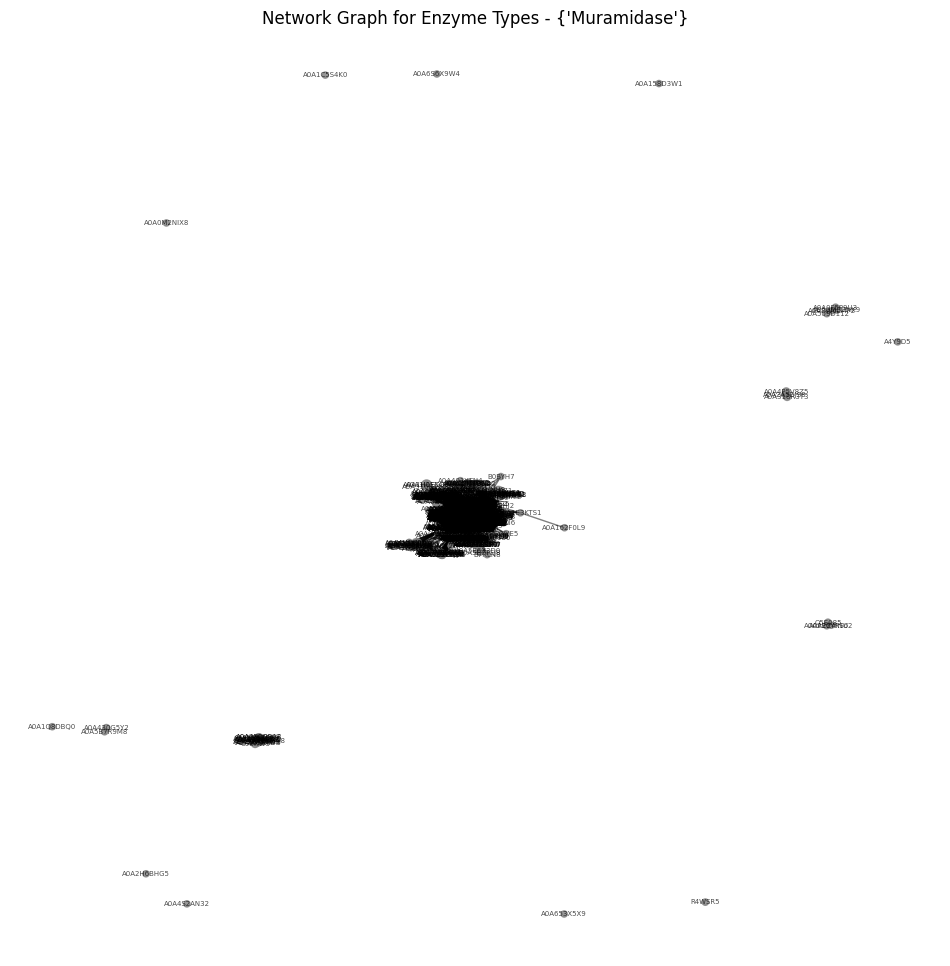

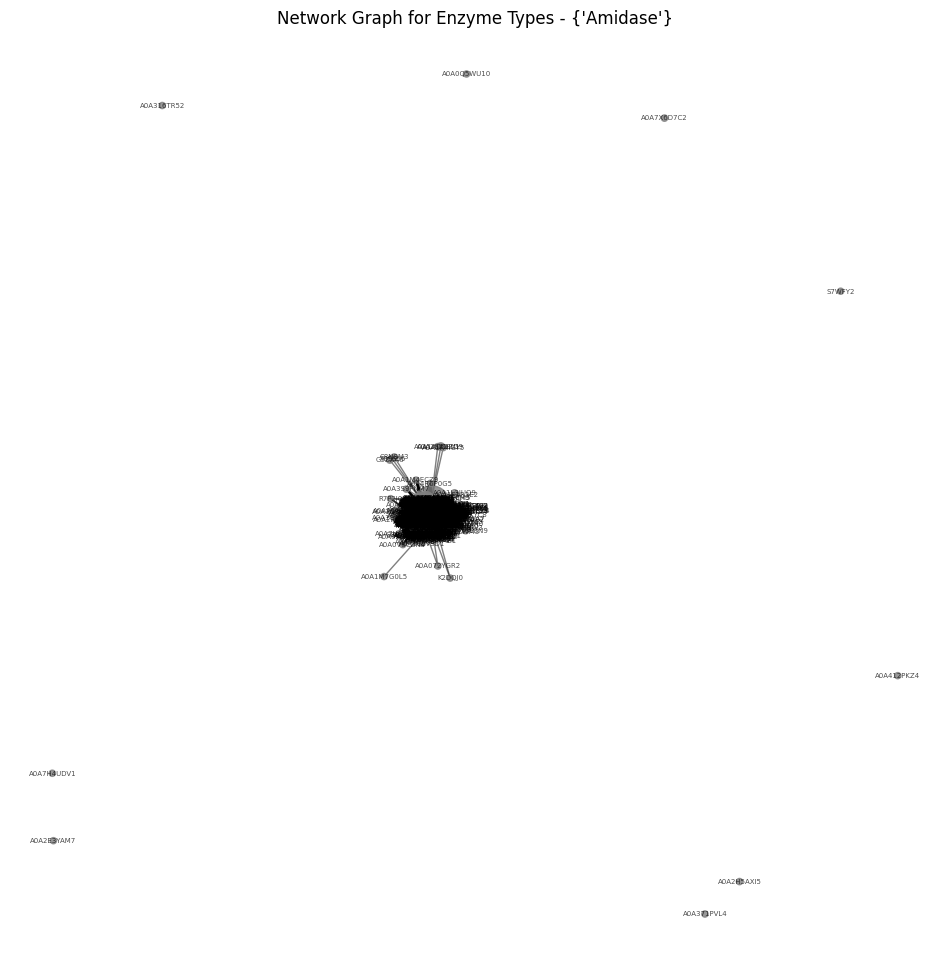

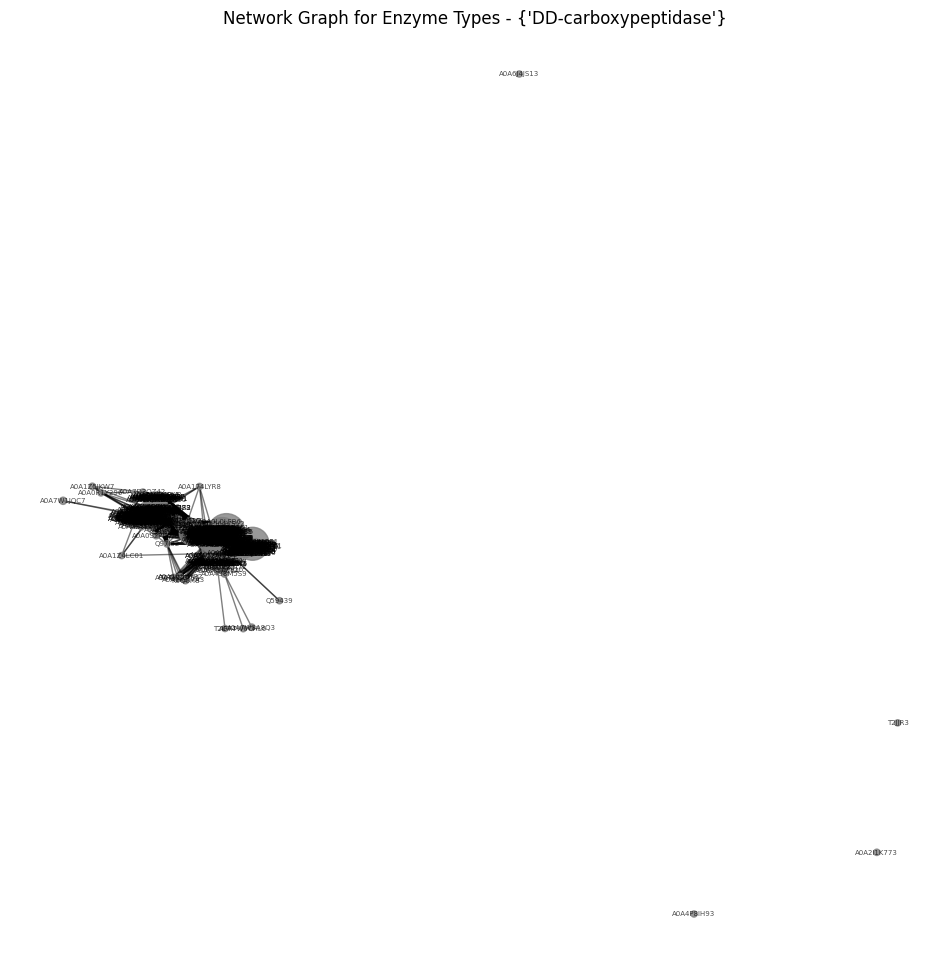

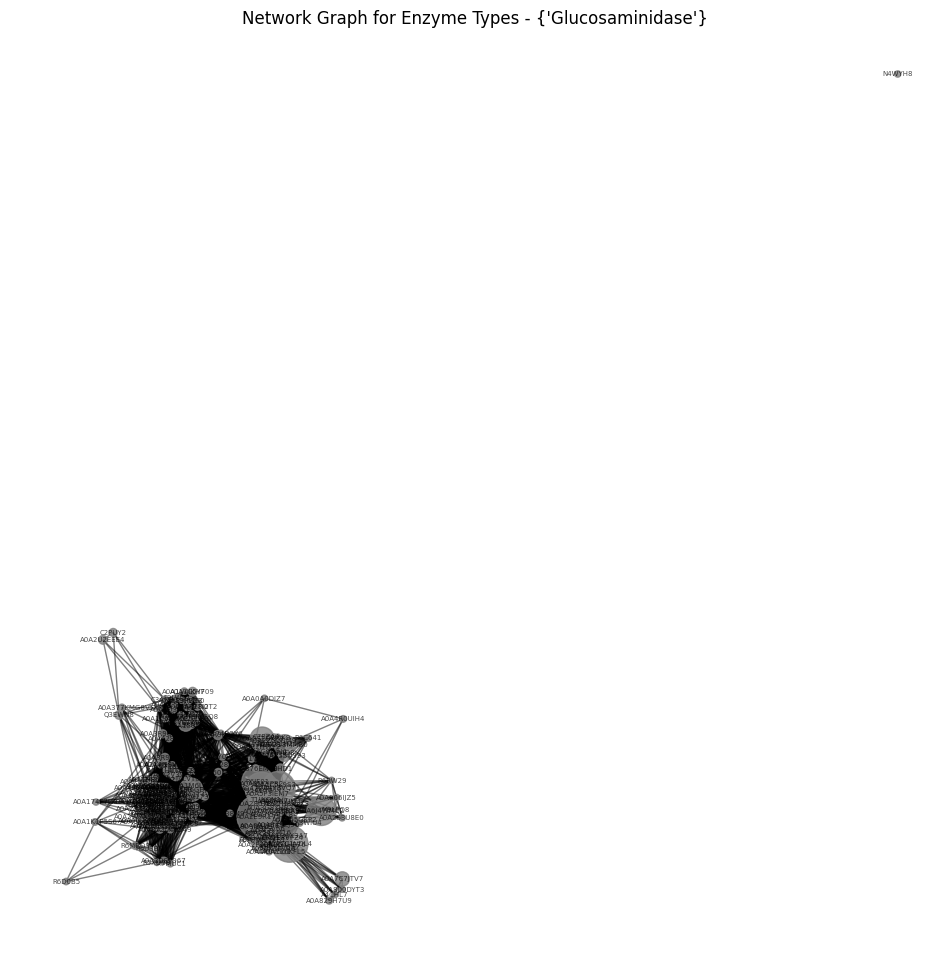

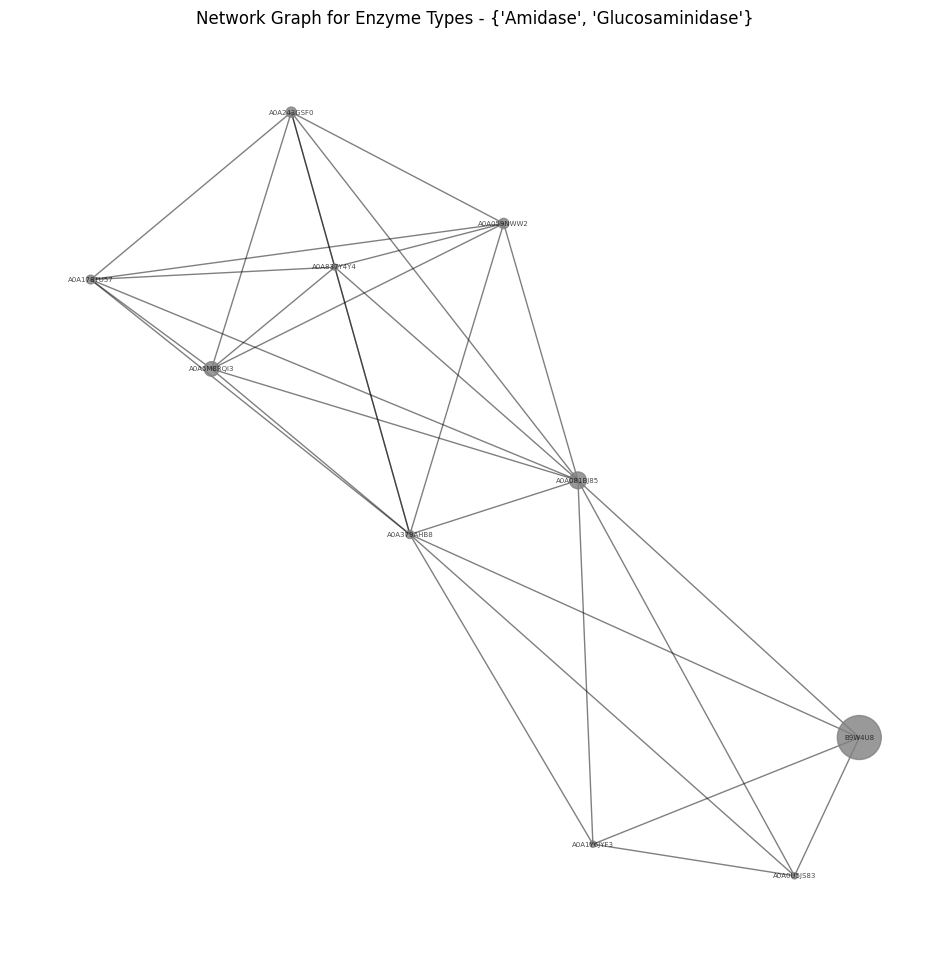

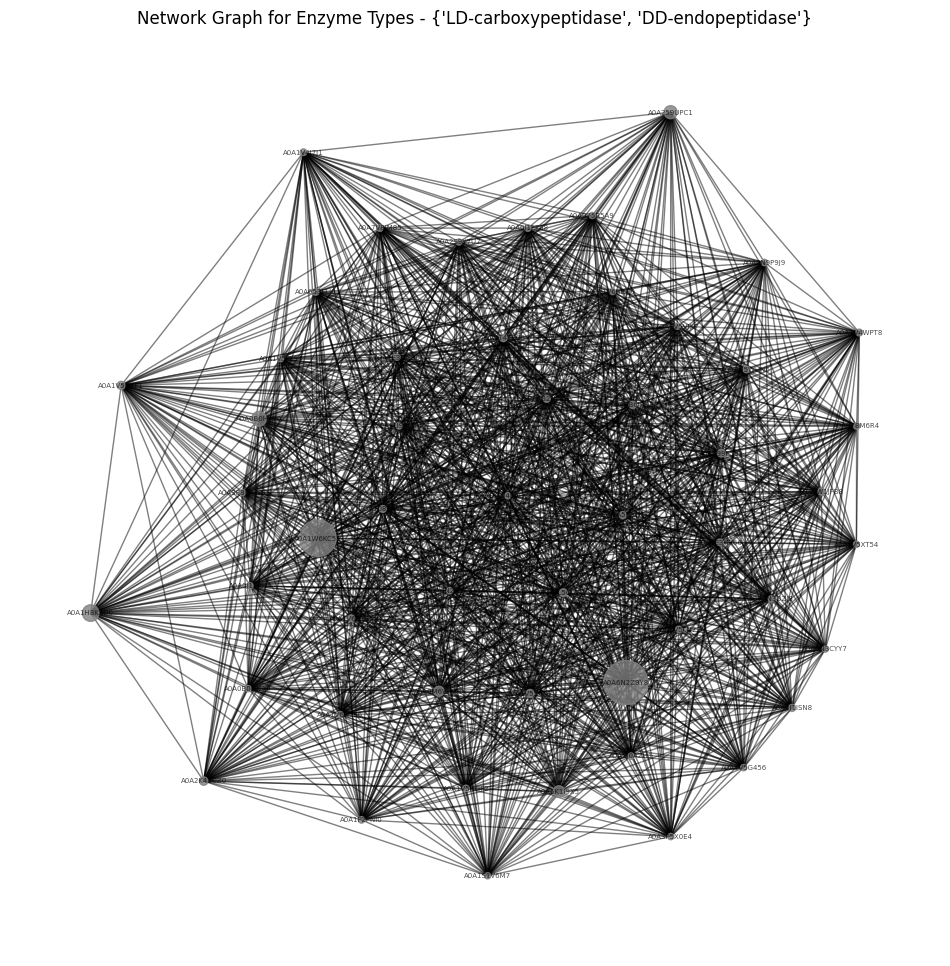

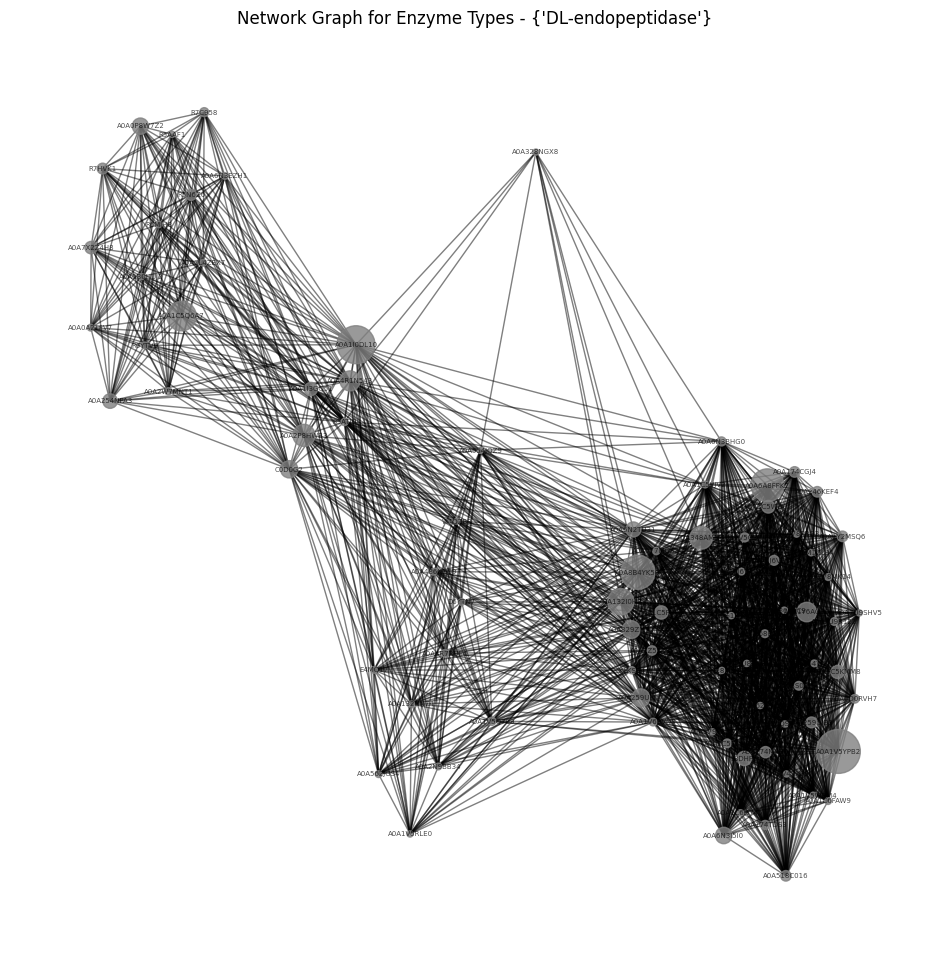

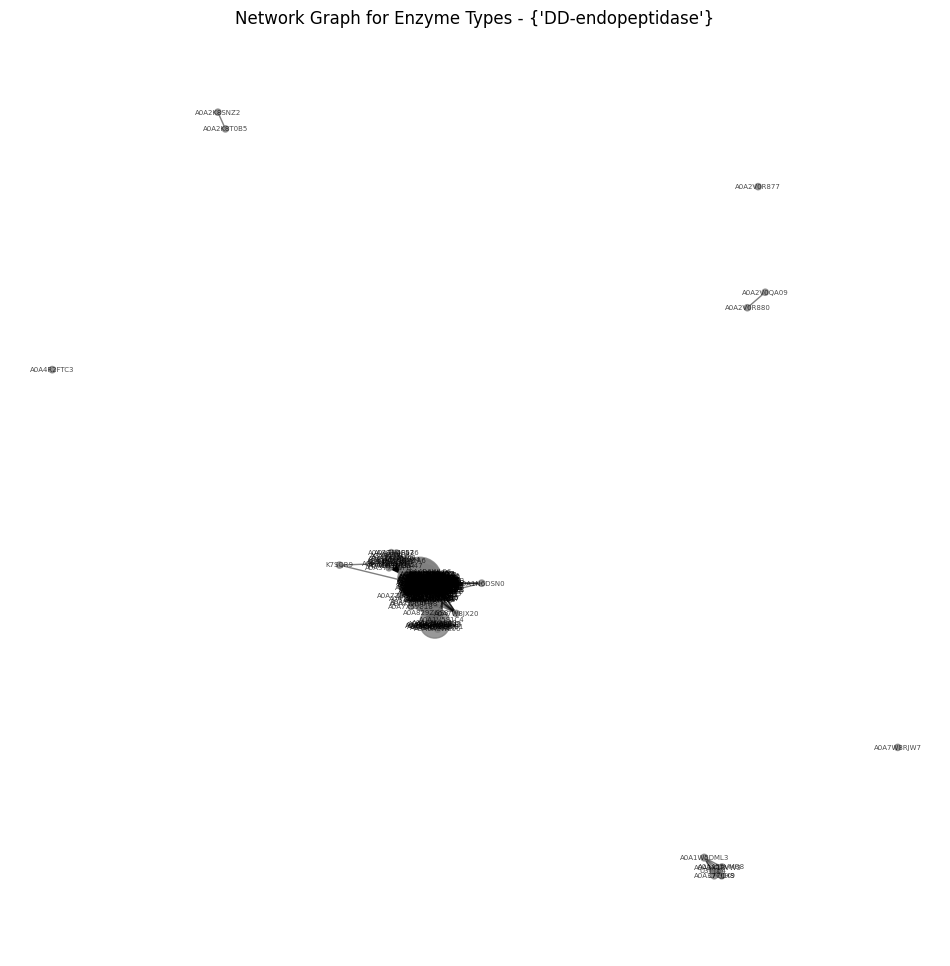

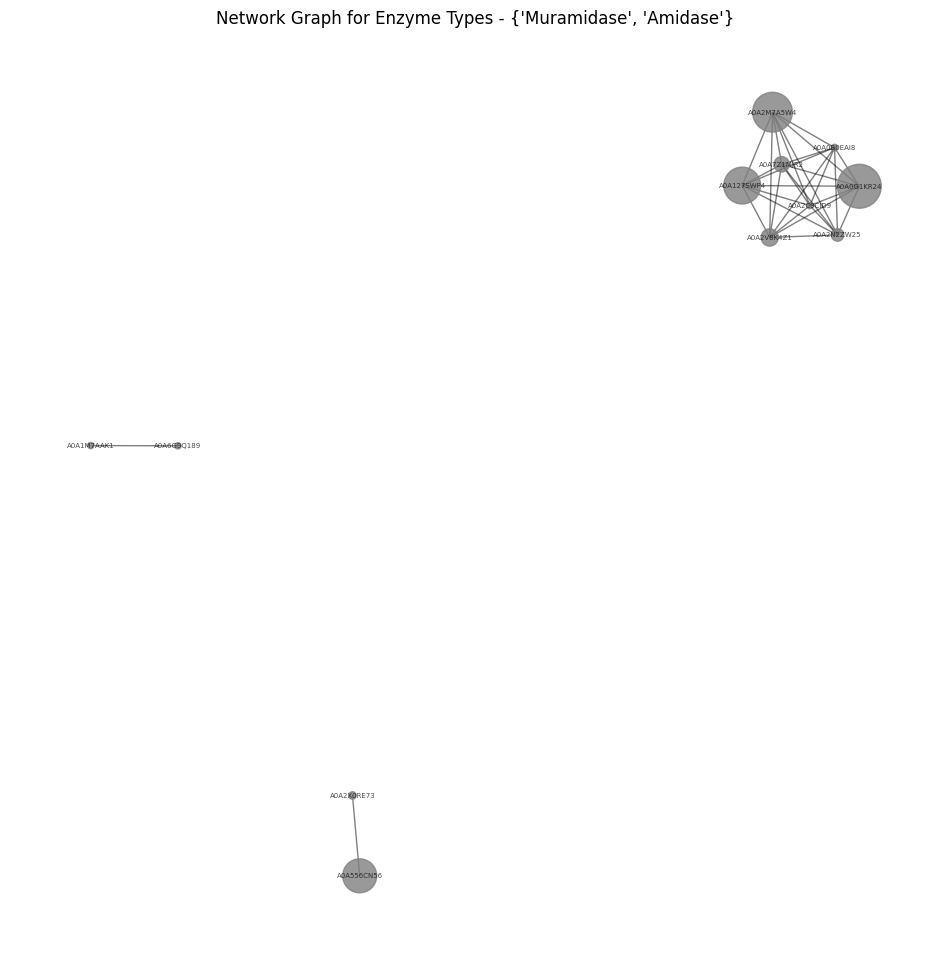

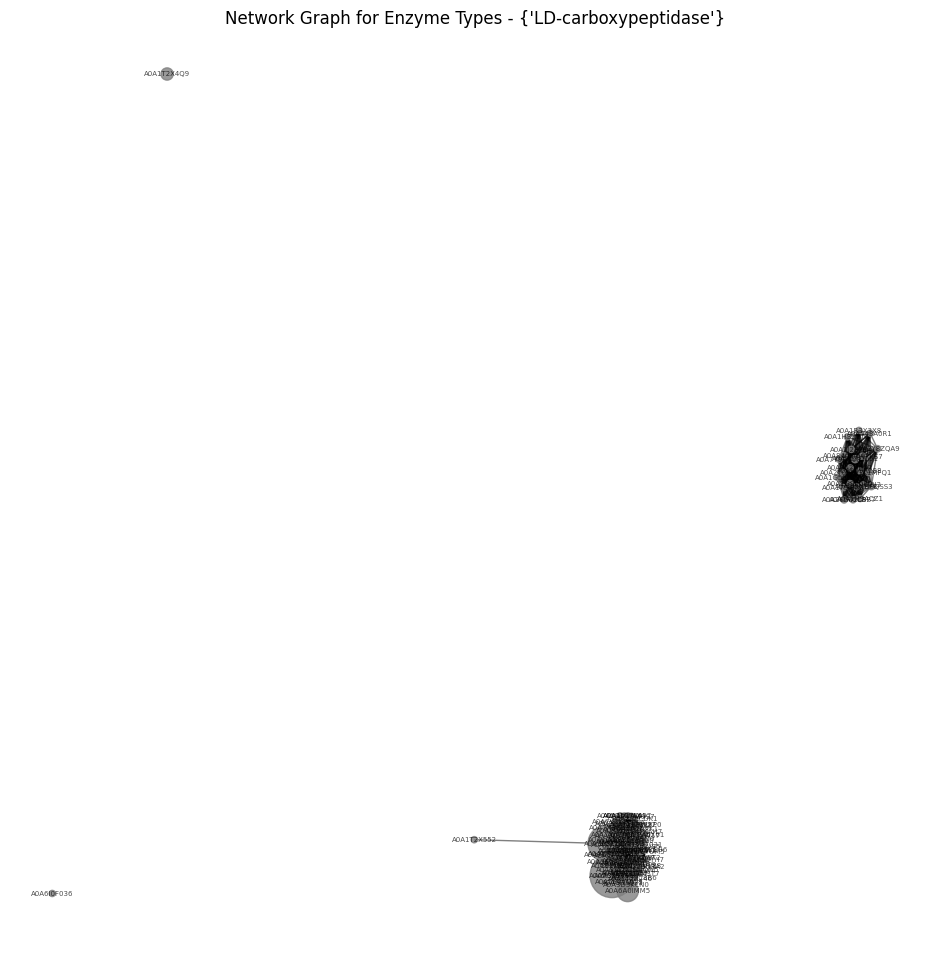

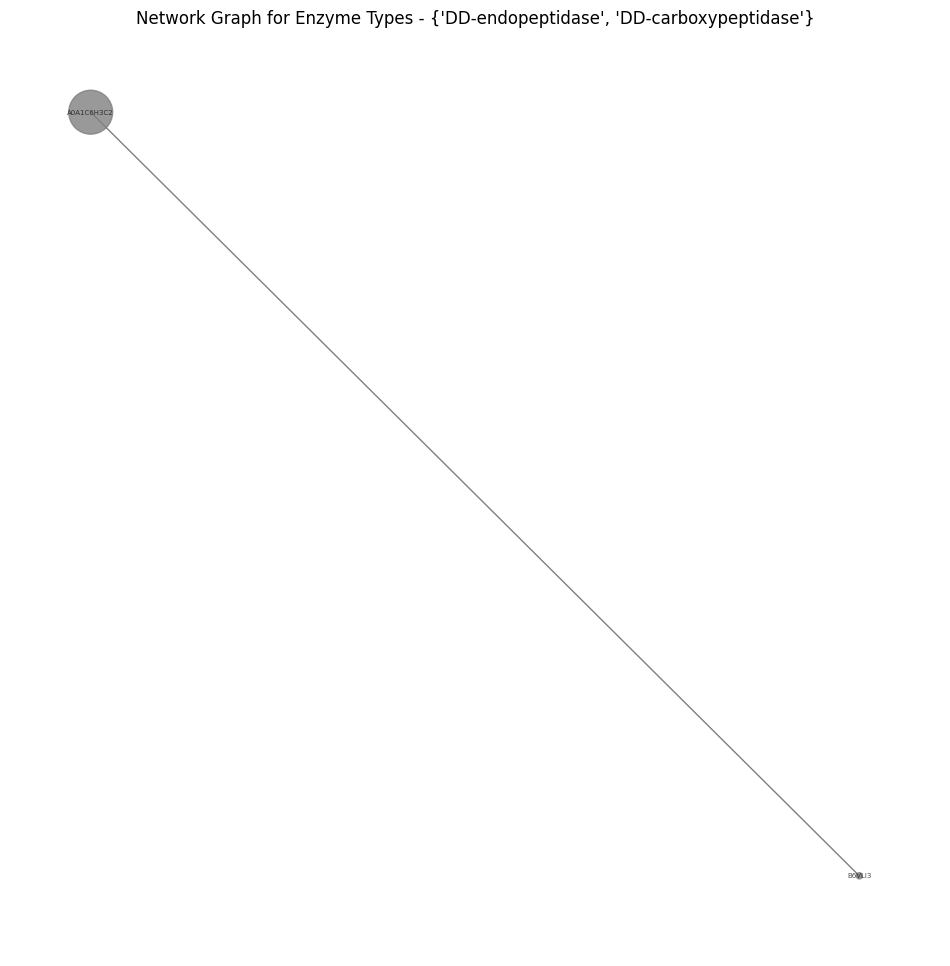

In [49]:
plot_network_for_all_enzymes(
    cluster_ids=cluster_ids,
    significant_edges=edges,
    merged_df=grouped_merged_domain_cluster,
    title="Network Graph for Enzyme Types"
)
